In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon
%matplotlib inline

compiled_data = pd.read_csv('compiled_data.csv')
compiled_data['ww_date'] = pd.to_datetime(compiled_data['ww_date'],format='%Y-%m-%d')

us_shape_path = 'cb_2021_us_nation_5m/cb_2021_us_nation_5m.shp'
us_shape = gpd.read_file(us_shape_path)

state_shape_path = 'cb_2021_us_state_500k/cb_2021_us_state_500k.shp'
state_shape = gpd.read_file(state_shape_path)

county_shape_path = 'cb_2021_us_county_500k/cb_2021_us_county_500k.shp'
county_shape = gpd.read_file(county_shape_path)
county_shape['county_fips'] = county_shape['STATEFP'].astype(str)+county_shape['COUNTYFP'].astype(str)
county_shape['county_fips'] = county_shape['county_fips'].astype(int)

In [2]:
full_county_li = list(compiled_data['county_fips'].unique())
full_county_shape = county_shape[county_shape['county_fips'].isin(full_county_li)]
full_county_shape

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,county_fips
7,42,129,01209191,0500000US42129,42129,Westmoreland,Westmoreland County,PA,Pennsylvania,06,2661762744,21294228,"POLYGON ((-79.90487 40.15481, -79.90478 40.157...",42129
14,25,017,00606935,0500000US25017,25017,Middlesex,Middlesex County,MA,Massachusetts,06,2118256715,75315911,"POLYGON ((-71.89877 42.71142, -71.82380 42.709...",25017
23,56,033,01605081,0500000US56033,56033,Sheridan,Sheridan County,WY,Wyoming,06,6535475075,7986330,"POLYGON ((-107.91152 45.00067, -107.90818 45.0...",56033
30,25,005,00606929,0500000US25005,25005,Bristol,Bristol County,MA,Massachusetts,06,1432553805,357457333,"MULTIPOLYGON (((-70.83595 41.60252, -70.83358 ...",25005
34,44,007,01219781,0500000US44007,44007,Providence,Providence County,RI,Rhode Island,06,1060552463,67870199,"POLYGON ((-71.79924 42.00807, -71.76601 42.009...",44007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,16,057,00395613,0500000US16057,16057,Latah,Latah County,ID,Idaho,06,2786483032,2369979,"POLYGON ((-117.03982 46.81607, -117.03972 46.8...",16057
3132,23,013,00581292,0500000US23013,23013,Knox,Knox County,ME,Maine,06,945723205,2017077723,"MULTIPOLYGON (((-68.55926 44.04502, -68.55504 ...",23013
3162,19,191,00465284,0500000US19191,19191,Winneshiek,Winneshiek County,IA,Iowa,06,1786666617,745729,"POLYGON ((-92.08120 43.16272, -92.08107 43.164...",19191
3206,50,007,01461760,0500000US50007,50007,Chittenden,Chittenden County,VT,Vermont,06,1390433437,217071279,"POLYGON ((-73.36263 44.56432, -73.35085 44.567...",50007


/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


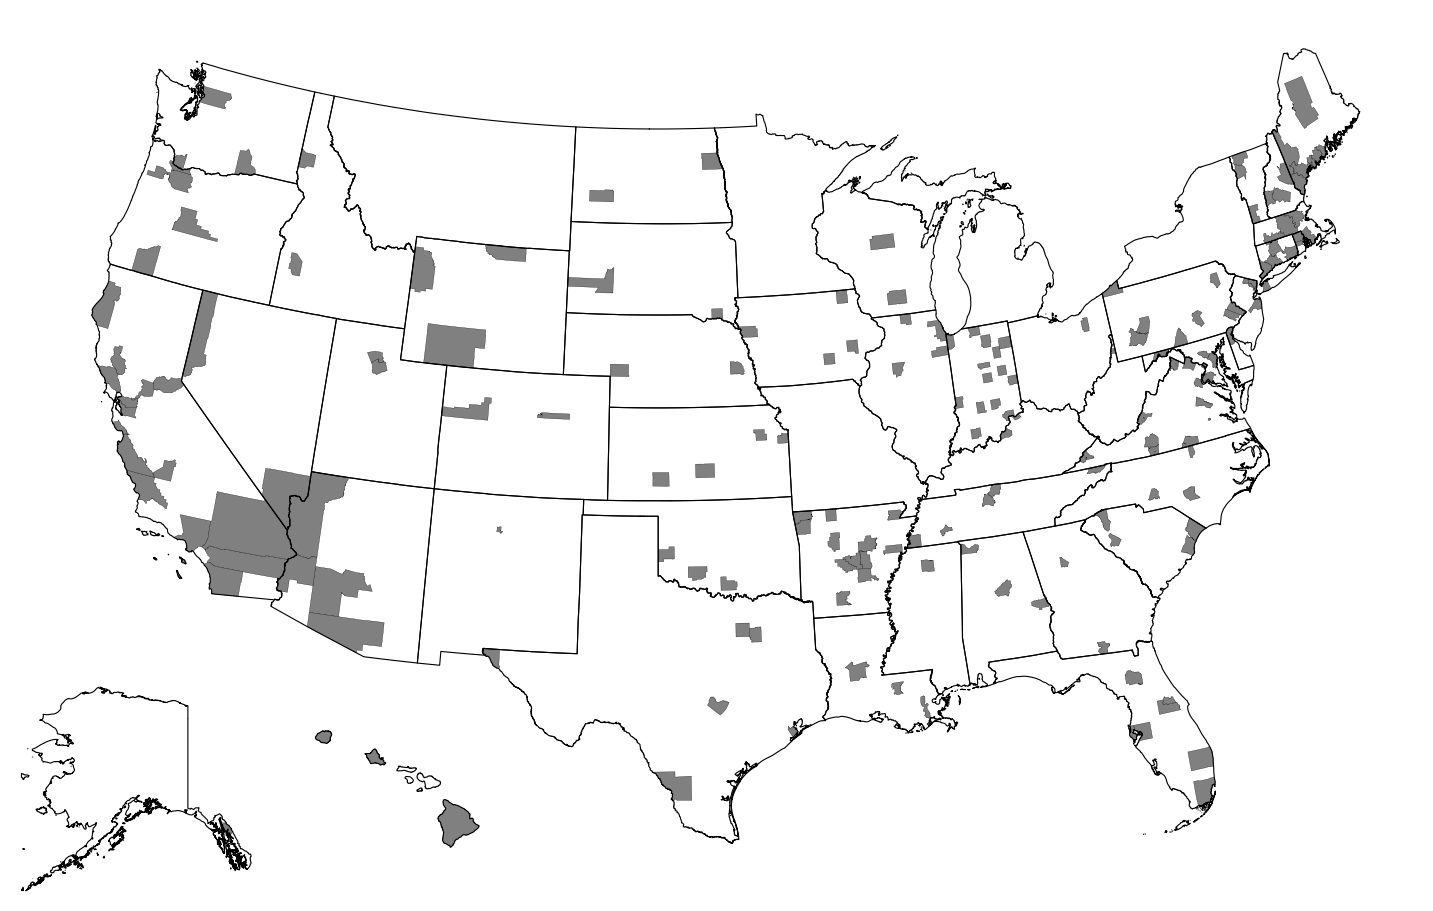

In [3]:
# Create a "copy" of gdf for re-projecting
visframe = state_shape.to_crs({'init':'epsg:2163'})
visframe1 = full_county_shape.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')
visframe[~visframe.NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.boundary.plot(color=None, linewidth=0.8, ax=ax, edgecolor='k')
visframe1[~visframe1.STATE_NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.plot(color='gray',edgecolor='k',linewidth=0.2,ax=ax)

# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   
akax.axis('off')
ak_shape = state_shape[state_shape.NAME=='Alaska'][['geometry']]
ak_shape1 = full_county_shape[full_county_shape.STATE_NAME=='Alaska'][['geometry']]
ak_polygon = Polygon([(-170,50),(-170,72),(-130, 72),(-130,50)])
ak_shape.clip(ak_polygon).geometry.boundary.plot(color=None, linewidth=0.8,ax=akax, edgecolor='k')
ak_shape1.clip(ak_polygon).geometry.plot(color='gray', linewidth=0.2,ax=akax, edgecolor='k')

# Add Hawaii Axis(x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1]) 
hiax.axis('off')
hi_shape = state_shape[state_shape.NAME=='Hawaii'][['geometry']]
hi_shape1 = full_county_shape[full_county_shape.STATE_NAME=='Hawaii'][['geometry']]
hi_polygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hi_shape.clip(hi_polygon).geometry.boundary.plot(color=None, linewidth=0.8,ax=hiax, edgecolor='k')
hi_shape1.clip(hi_polygon).geometry.plot(color='gray', linewidth=0.2,ax=hiax, edgecolor='k')
plt.savefig('fig1j.png',dpi=300)
plt.show()
